In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv("TSLA.csv")

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2840,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2841,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2842,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2843,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [4]:
data = data.dropna() #Drop missing values if any

In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"] = data["Date"].map(dt.datetime.toordinal)

In [6]:
data_DateClose = data.drop(["High", "Low", "Open","Adj Close", "Volume"], axis="columns")

In [7]:
data_DateClose

,Date,Close
0,733952,4.778000
1,733953,4.766000
2,733954,4.392000
3,733955,3.840000
4,733959,3.222000
...,...,...
2840,738071,785.489990
2841,738074,791.940002
2842,738075,805.719971
2843,738076,811.080017


In [8]:
# Make 2 subsets using train_test_split that splits into random subsets.
train, test = train_test_split(data_DateClose, test_size=0.2, random_state=42)

In [9]:
#Set up linear regression
regression_training = linear_model.LinearRegression()

#Separate date and close with both train and test
training_date = train.drop("Close", axis = "columns")
training_close = train.drop("Date", axis = "columns")
testing_date = test.drop("Close", axis = "columns")
testing_close = test.drop("Date", axis = "columns")

In [10]:
regression_training.fit(training_date, training_close)
training_date_datetime = training_date["Date"].apply(dt.datetime.fromordinal)


In [11]:
training_prediction = regression_training.predict(training_date)

In [12]:
testing_prediction = regression_training.predict(testing_date)
testing_date_datetime = testing_date["Date"].apply(dt.datetime.fromordinal)

In [13]:
dateInput = dt.date(2025, 1, 1)
ordinalInput = dateInput.toordinal()

In [14]:
training_output = regression_training.predict([[ordinalInput]])

#Need to format datetime so it can be printed correctly in output
formattedDate = dateInput.strftime("%D")

outputString = "Predicted price for Tesla at " + formattedDate + " is " + str("%.5f" % training_output[0][0])

C:\Users\alexa\anaconda3\envs\dave3625\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
print(outputString)

Predicted price for Tesla at 01/01/25 is 432.28700


In [16]:
#Testing different date
dateInput = dt.date(2030, 1, 1)
ordinalInput = dateInput.toordinal()

training_output = regression_training.predict([[ordinalInput]])
formattedDate = dateInput.strftime("%D")

outputString = "Predicted price for Tesla at " + formattedDate + " is " + str("%.5f" % training_output[0][0])
print(outputString)

Predicted price for Tesla at 01/01/30 is 616.79970


C:\Users\alexa\anaconda3\envs\dave3625\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
#checking prediction accuracy percentage
print( r2_score(training_close, training_prediction))

0.41046323935945495


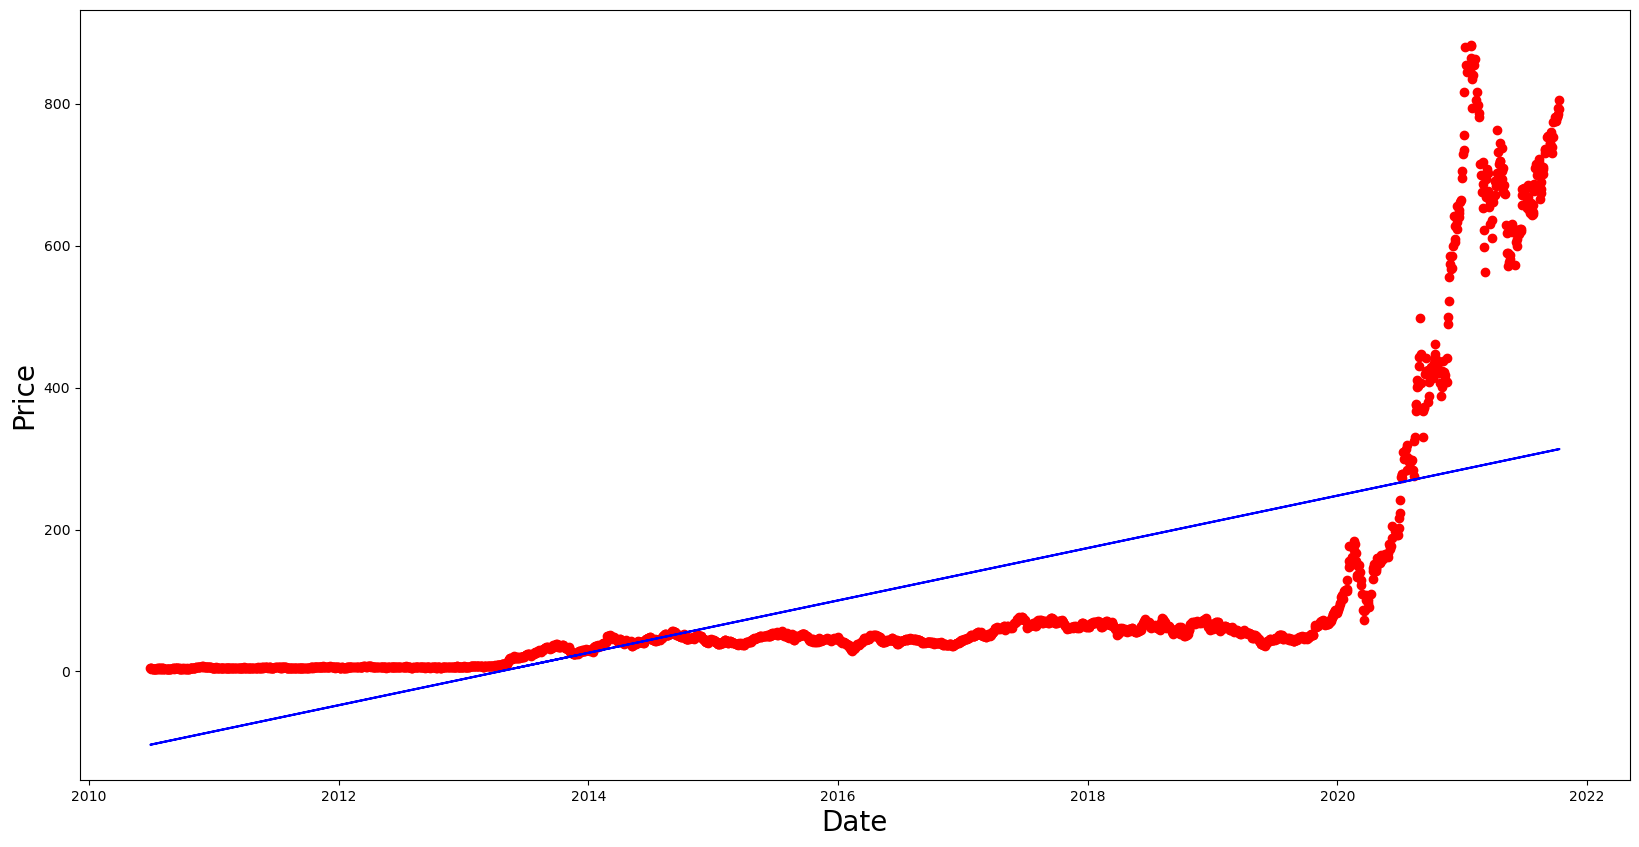

In [19]:
#Visualize data as a scatter plot to show how linear regression reads the data.
plt.figure(figsize =(20,10))
plt.xlabel("Date", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.scatter(training_date_datetime, training_close, color="red")
plt.plot(training_date_datetime, training_prediction, color="blue")

In [ ]:
#The sudden spike at 2020 explains why the prediction is so off, as the more stable prices from 2010-2020 affect the linear regression.